## Rental Cars

A car rental company has two locations, Albany and Boston. Some customers do “one-way rentals,” picking up a car in Albany and returning it in Boston, or the other way around. Each week 5% of the cars in Albany are dropped off in Boston, and 3% of the cars in Boston get dropped off in Albany. At the beginning of the year, there are 150 cars at each location.

Write a program that plots the number of cars in Albany and Boston each week for 1 year (52 weeks) to find if the number of cars eventually stays the same. Mark both cities on the same plot with different symbols or colors.

Hints:

Create arrays boston and albany to contain the 52 values using the zeros function.

First write the lines of code that update the number of cars in each location from one week to the next. Initialize the variables Albany and Boston with the number of cars in each location at the beginning of the week. Calculate the number of cars moving Albany->Boston and Boston->Albany. Then compute the next values for the arrays albany and boston.

Put this in a loop to repeat for 52 weeks

Note: cars are countable things, so a and b should always be integer values. You can use the rint function in numpy to round off the number of cars that move during each week. 
https://numpy.org/doc/stable/reference/generated/numpy.rint.html

You can start your program like this. A couple things to notice:

1) I define the percent of cars moving each way as a variable right up top. This way I 
    a) avoid accidentally using different values later 
    b) can easily change the percentages to run a new simulation.

2) I created empty arrays to contain the number of cars for each week. The simulations will fill these in.


In [1]:
from numpy import zeros, rint

# Fraction of one-way rentals
FrAtoB = 5/100 # Fraction Albany to Boston
FrBtoA = 3/100 # Fraction Boston to Albany

# Initiallize arrays for number of cars
nweek=52 # number of weeks in a year
Albany = zeros(nweek)
Boston = zeros(nweek)

Now let's do the simulation. Start at week zero with initial values

In [2]:
Albany[0] = 150
Boston[0] = 150

Now loop over weeks and move cars. Note the folloowing:

1) I compute the number of cars moved each way separately and add/subtract exactly the same to each city. This forces conservbation of cars and is actully more efficient (fewer calculations). As a physicist, we are more concerned with making sure we preserve the laws of physics than that our code is "efficient".

2) Cars come in whole numbers, not fractions! So use rint to round to nearest integer.

In [3]:
for i in range(1,nweek):
    # calculate the total number of cars going one-way to each city
    # and round to the nearest integer -- cars are always whole!
    AtoB = rint(FrAtoB*Albany[i-1])
    BtoA = rint(FrBtoA*Boston[i-1])
    
    Albany[i] = Albany[i-1] - AtoB + BtoA
    Boston[i] = Boston[i-1] + AtoB - BtoA 

## Plots

When complete, plot a the number of cars at each week using the pyplot package https://matplotlib.org/tutorials/introductory/pyplot.html


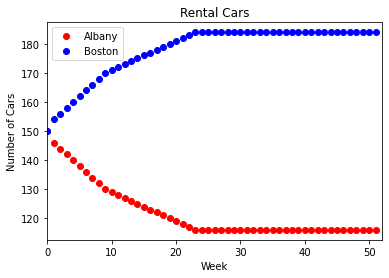

In [4]:
# Plot the resuls
from matplotlib.pyplot import figure, plot, show, xlim, xlabel, title, legend
import matplotlib.pyplot as plt

figure()
plot(arange(nweek), Albany, 'ro', label='Albany') # note that our x axis is just the sequence
plot(arange(nweek), Boston, 'bo', label='Boston') # 1,2,...,52 which we make with 1:Nweeks

# Annotate the plot
xlim((0, nweek)) # adujust x-axis limits
xlabel('Week')
ylabel('Number of Cars')
title('Rental Cars')
legend() 
show()